In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(1, '../')

import experiment
import pickle
from utils import *
from Architectures import *
import random, os
suppress_warnings()
EPOCHS = 256


def countp(model, params):
    tmp = model(**params)
    tmp.build(input_shape=(1,15,7))
    return tmp.count_params()


n_params = []

os.environ['PYTHONHASHSEED']=str(0)
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.0f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])


filename = '../data/data100k_raw_combined_atlas_cut.pkl'
n_experiments = 8
SUFFIX = 'latent28'


#TESTING ######
# EPOCHS = 2
# filename = '../data/data50k_raw_combined_atlas_cut_small.pkl'
# n_experiments = 2
# SUFFIX = 'latent28'
###########

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++  -O3 -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.22/08


2022-07-12 18:01:09.781263: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 18:01:09.781301: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import seaborn as sns
import os

#to get latex to work 
os.environ['PATH'] = "%s:/usr/local/cuda-11.2/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/anaconda/bin:/home/delon/texlive/bin/x86_64-linux:/home/delon/.local/bin:/home/delon/bin"%os.environ['PATH']


PIl64 = experiment.Experimenter(filename)
PIl64.fromSaved()

PI = experiment.Experimenter(filename)
PI.fromSaved(suffix=SUFFIX)

Initializing Experimenter
	Loading Data from ../data/data100k_raw_combined_atlas_cut.pkl
	Data Loaded
	Creating Splits
	Splits Created
Done initalizing
Loading Experimenter from Saved Experimenter at /data/delon/experimenter/data100k_raw_combined_atlas_cut
Experimenter Loaded
Getting split
Split Stored
Loading models
{'particlewise_128_4_64': 'models/data100k_raw_combined_atlas_cut_particlewise_128_4_64', 'nested_concat_70_4_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_70_4_64_3', 'nested_concat_general_68_3_64_3': 'models/data100k_raw_combined_atlas_cut_nested_concat_general_68_3_64_3', 'tripletwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_tripletwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_5_(64, 128, 256, 128, 64)_64': 'models/data100k_raw_combined_atlas_cut_pairwise_5_(64, 128, 256, 128, 64)_64', 'pairwise_nl_5_(64, 128, 256, 128, 64)_32_64': 'models/data100k_raw_combined_atlas_cut_pairwise_nl_5_(64, 128, 256, 128, 64)_32_64', 'pairwis

2022-07-12 18:01:42.632710: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 18:01:42.632768: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 18:01:42.632819: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (top1.hep.utexas.edu): /proc/driver/nvidia/version does not exist
2022-07-12 18:01:42.633361: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
latent64 = PIl64.models['%s_%s'%('pairwise', PIl64.get_tail_string(model_params_dict['pairwise']))]
latent2 = PI.models['latent_two_5_(64, 128, 256, 128, 2)_64']
latent8 = PI.models['latent_eight_5_(64, 128, 256, 128, 8)_64']

In [21]:
PI.get_ROC('latent_two', model_params_dict['latent_two'])

getting ROC for latent_two
pog


(array([0.        , 0.        , 0.        , ..., 0.97726361, 0.97733048,
        1.        ]),
 array([0.00000000e+00, 3.32314236e-05, 4.95148212e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.99984789e+00, 9.99847889e-01, 9.98715162e-01, ...,
        2.19616995e-05, 2.18937785e-05, 1.10760304e-10], dtype=float32),
 0.9602683074566158)

In [6]:
X_test_latent, y_test_latent = PI.get_test_dataset('latent_two')
X_test, y_test = PIl64.get_test_dataset('pairwise')
X_test_ATLAS, y_test_ATLAS = gen_dataset_high_level(PIl64.events_test, PIl64.events_oup_test, PIl64.events_tag_test)

In [7]:
n_cut = int(len(X_test)*0.1)
assert(len(X_test) == len(X_test_latent))

indices = np.random.permutation(len(X_test))
cut = np.s_[indices[:n_cut]]

latent_label = y_test.numpy()[cut]
latent_label_28 = y_test_latent.numpy()[cut]

In [46]:
latent64_embedded = compute_tsne(latent64, X_test=X_test, cut=cut)

64
computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 1.7696, 50 iterations in 2.3114 sec
Iteration  100, KL divergence 1.7684, 50 iterations in 2.2295 sec
Iteration  150, KL divergence 1.7586, 50 iterations in 2.2567 sec
Iteration  200, KL divergence 1.7624, 50 iterations in 2.2507 sec
Iteration  250, KL divergence 1.7760, 50 iterations in 2.2232 sec
   --> Time elapsed: 11.27 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 1.2493, 50 iterations in 2.3786 sec
Iteration  100, KL divergence 1.1228, 50 iterations in 2.2421 sec
Iteration  150, KL divergence 1.0895, 50 iterations in 2.1973 sec
Iteration  200, KL divergence 1.0745, 50 iterations in 2.1909 

In [48]:
ATLAS_embedded = compute_tsne_embedded(np.array(X_test_ATLAS)[cut])
latent8_embedded = compute_tsne(latent8, cut=cut, X_test=X_test_latent)

8
computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 2.0966, 50 iterations in 2.4948 sec
Iteration  100, KL divergence 2.0787, 50 iterations in 2.5187 sec
Iteration  150, KL divergence 2.0788, 50 iterations in 2.4994 sec
Iteration  200, KL divergence 2.0788, 50 iterations in 2.5226 sec
Iteration  250, KL divergence 2.0788, 50 iterations in 2.4712 sec
   --> Time elapsed: 12.51 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 0.8260, 50 iterations in 2.3860 sec
Iteration  100, KL divergence 0.5773, 50 iterations in 2.2434 sec
Iteration  150, KL divergence 0.4965, 50 iterations in 2.1998 sec
Iteration  200, KL divergence 0.4543, 50 iterations in 2.1553 s

In [44]:
latent2_embedded = compute_tsne(latent2, cut=cut, X_test=X_test_latent, perplexity=[1000,1998])

2
computing tsne
--------------------------------------------------------------------------------
TSNE(n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Running optimization with exaggeration=12.00, lr=500.00 for 250 iterations...
Iteration   50, KL divergence 1.2825, 50 iterations in 2.3878 sec
Iteration  100, KL divergence 1.2551, 50 iterations in 2.5162 sec
Iteration  150, KL divergence 1.2284, 50 iterations in 2.4375 sec
Iteration  200, KL divergence 1.2284, 50 iterations in 2.3883 sec
Iteration  250, KL divergence 1.2285, 50 iterations in 2.2998 sec
   --> Time elapsed: 12.03 seconds
===> Running optimization with exaggeration=1.00, lr=500.00 for 500 iterations...
Iteration   50, KL divergence 0.1275, 50 iterations in 2.1600 sec
Iteration  100, KL divergence 0.0945, 50 iterations in 2.1398 sec
Iteration  150, KL divergence 0.0915, 50 iterations in 2.1986 sec
Iteration  200, KL divergence 0.0911, 50 iterations in 2.1590 s

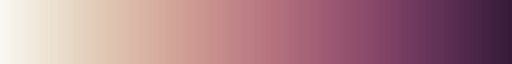

In [10]:
sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True)

[ 9.37916411e-16 -5.68434189e-17] [23.82712648  5.96360477]
0.9897723523589574
earth_movers_distance 1.0849181597729587


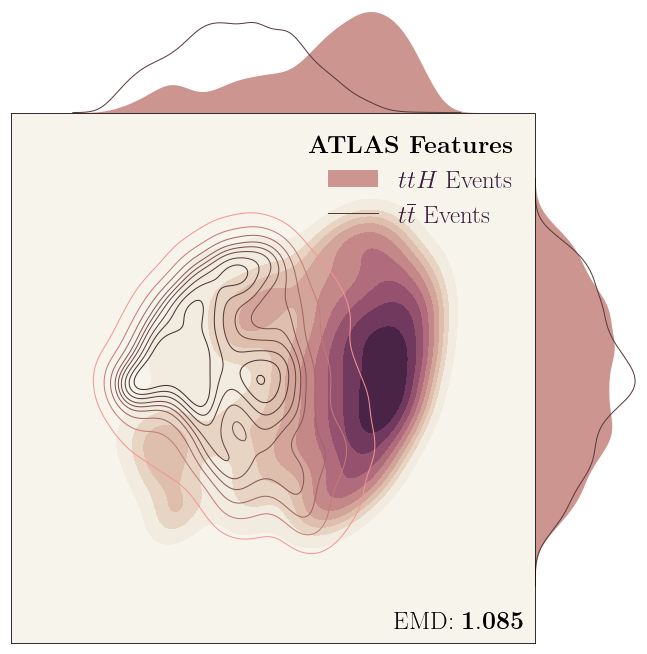

In [49]:
axATLAS = gen_tsne(ATLAS_embedded, latent_label, text=r'\textbf{ATLAS Features}',
                   cmap = sns.cubehelix_palette(start=2/10, light=.97, as_cmap=True), col_aux='#f49595')
axATLAS.savefig('figures/ATLAS_tsne.pdf')

[-9.9475983e-17 -5.5659181e-17] [5.49529482 2.31765794]
0.9897723523589574
earth_movers_distance 1.6019961032905716


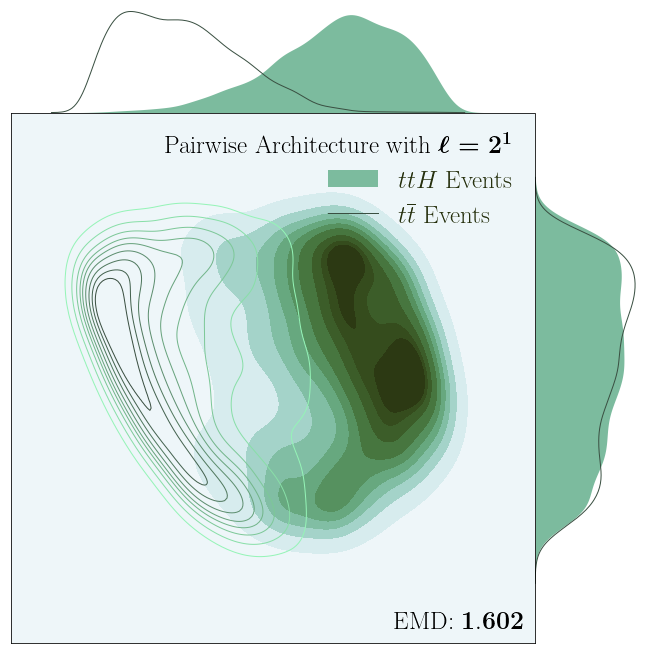

In [45]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^1}$',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7')
ax.savefig('figures/l2_tsne.pdf')

[1.5158245e-16 9.9475983e-17] [15.27781411  6.54219055]
0.9897723523589574
earth_movers_distance 1.2822876643756214


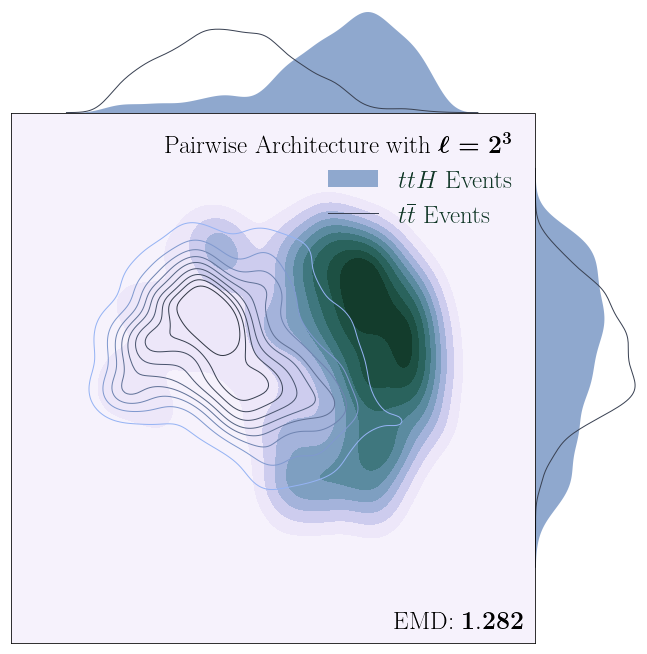

In [50]:
ax = gen_tsne(latent8_embedded, latent_label_28, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^3}$',
              cmap=sns.cubehelix_palette(start=20/10, light=.97, as_cmap=True), col_aux='#95b3f4')
ax.savefig('figures/l8_tsne.pdf')

[2.93690997e-16 3.31586610e-17] [10.15079574  5.71092497]
0.9897723523589574
earth_movers_distance 1.5284376797659642


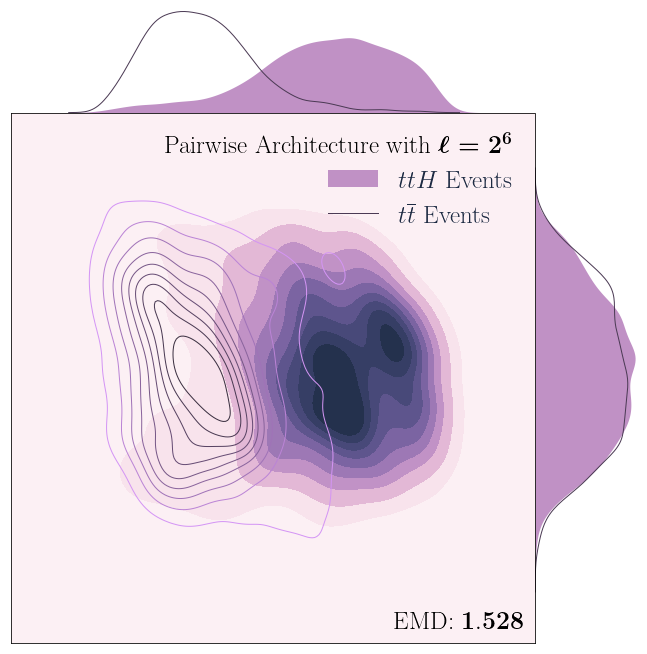

In [47]:
axl64 = gen_tsne(latent64_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',
                )
axl64.savefig('figures/l64_tsne.pdf')

In [ ]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
no_tsne= gen_tsne(l2_yhat, y_test_latent.numpy()[cut], text=r'Latent Represetations',
                  cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True, hue=0), col_aux='#737373',
                  EMD=False,
         rotated=True, log=False, bnds=True, standardized=False)
no_tsne.savefig('figures/l2_notsne.pdf')

In [ ]:
ax = gen_tsne(latent2_embedded, latent_label_28, text=r'\textbf{t-SNE Embedding} of Latent Represetations',
             cmap=sns.cubehelix_palette(start=14/10, light=.97, as_cmap=True), col_aux='#95f4b7',
              EMD=False)
ax.savefig('figures/l2_tsne_waxis.pdf')

In [ ]:
l64_yhat = LatentGetter(latent64.layers[0:3], condensed=True).predict(X_test.numpy()[cut])
print(emd(l64_yhat, y_test.numpy()[cut]))

In [ ]:
l8_yhat = LatentGetter(latent8.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(emd(l8_yhat, y_test_latent.numpy()[cut]))

In [ ]:
l2_yhat = LatentGetter(latent2.layers[0:3], condensed=True).predict(X_test_latent.numpy()[cut])
print(emd(l2_yhat, y_test_latent.numpy()[cut]))

In [ ]:
print(emd(np.array(X_test_ATLAS), y_test_ATLAS))

In [ ]:
TEMP_gen_tsne(latent64_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(latent8_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(latent2_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)

In [ ]:
TEMP_gen_tsne(ATLAS_embedded, latent_label, text=r'{Pairwise Architecture with} \boldmath$\mathbf{\ell=2^6}$ ',)